# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [2]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print(X_train.shape)

(49000, 32, 32, 3)


In [5]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [6]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

#learning_rates = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 5e-9, 5e-8, 5e-7, 5e-6, 5e-5]
#regularization_strengths = [5e3, 5e4, 5e5, 5e6, 5e7, 1e3, 1e4, 1e5, 1e6, 1e7]
#Performs better near lr = 1e-5, reg = 1e3
learning_rates = []
regularization_strengths = []
for x in range(0, 5):
    learning_rates.append(np.random.random() * 1e-4)
    regularization_strengths.append(np.random.random() * 1e4)
    print(learning_rates, reg)
    #print(np.random.random() * 1e4)
results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
for lr in learning_rates:
    for reg in regularization_strengths:
        svm = LinearSVM()
        loss = svm.train(X_train_feats, y_train, learning_rate = lr, reg = reg, num_iters = 1500, verbose = False)
        y_train_pred = svm.predict(X_train_feats)
        y_val_pred = svm.predict(X_val_feats)
        training_accuracy = np.mean(y_train_pred == y_train)
        val_accuracy = np.mean(y_val_pred == y_val)
        results[(lr, reg)] = (training_accuracy, val_accuracy)
        
        if best_val < val_accuracy:
            best_val = val_accuracy
            best_svm = svm
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

[4.396981852488765e-05] 6316.207395058644
[4.396981852488765e-05, 4.437916024934257e-05] 6316.207395058644
[4.396981852488765e-05, 4.437916024934257e-05, 4.759437793979735e-05] 6316.207395058644
[4.396981852488765e-05, 4.437916024934257e-05, 4.759437793979735e-05, 6.847339138601991e-05] 6316.207395058644
[4.396981852488765e-05, 4.437916024934257e-05, 4.759437793979735e-05, 6.847339138601991e-05, 8.669877401354831e-07] 6316.207395058644
lr 8.669877e-07 reg 5.076150e+02 train accuracy: 0.310102 val accuracy: 0.334000
lr 8.669877e-07 reg 2.129073e+03 train accuracy: 0.413592 val accuracy: 0.410000
lr 8.669877e-07 reg 5.437027e+03 train accuracy: 0.414347 val accuracy: 0.421000
lr 8.669877e-07 reg 6.763697e+03 train accuracy: 0.411653 val accuracy: 0.418000
lr 8.669877e-07 reg 6.948350e+03 train accuracy: 0.413510 val accuracy: 0.416000
lr 4.396982e-05 reg 5.076150e+02 train accuracy: 0.406000 val accuracy: 0.407000
lr 4.396982e-05 reg 2.129073e+03 train accuracy: 0.397204 val accuracy: 0.

In [7]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.421


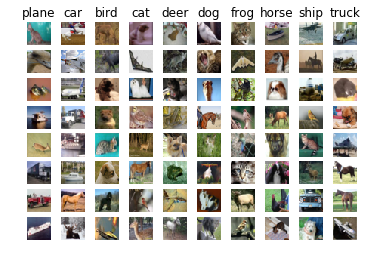

In [8]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?
Some of them do. Cause their shapes look like the class that they are classified.

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [9]:
print(X_train_feats.shape)

(49000, 155)


In [40]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None
best_val_acc = 0
################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
drop_out_ps = [0.5]
#learning_rates = [1e-1, 1e-3]
#learning_rate_decays = [0.95, 0.98]
lr_lrds = [(1, 0.95), (1e-1, 0.95), (1e-3, 0,98)]
regs = [1e-4, 5e-3, 1e-3]
for drop_out_p in drop_out_ps:
    #for lr in learning_rates:
        #for lrd in learning_rate_decays:
        for lr_lrd in lr_lrds:
            for reg in regs:
                net = TwoLayerNet(input_dim, input_dim, num_classes)
                net.drop_out_p = drop_out_p
                stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
                    num_iters=3500, batch_size=400,
                    learning_rate=lr_lrd[0], learning_rate_decay=lr_lrd[1],
                    reg=reg, verbose=True)
                val_acc = (net.predict(X_val_feats) == y_val).mean()
                print('Validation accuracy: ', val_acc)
                print('hs: %d, dop: %f, lr: %f, lrd: %f, reg: %f' % (hidden_dim, drop_out_p, lr, lrd, reg) )
                if val_acc > best_val_acc:
                    best_net = net
                    best_val_acc = val_acc
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

49000
iteration 0 / 3500: loss 2.302585 train_acc: 0.175000 val_acc 0.151000 train_ass - val_acc 0.024000 
iteration 500 / 3500: loss 1.204667 train_acc: 0.660000 val_acc 0.546000 train_ass - val_acc 0.114000 
iteration 1000 / 3500: loss 1.325887 train_acc: 0.632500 val_acc 0.568000 train_ass - val_acc 0.064500 
iteration 1500 / 3500: loss 1.337997 train_acc: 0.607500 val_acc 0.589000 train_ass - val_acc 0.018500 
iteration 2000 / 3500: loss 1.257275 train_acc: 0.650000 val_acc 0.595000 train_ass - val_acc 0.055000 
iteration 2500 / 3500: loss 1.241530 train_acc: 0.720000 val_acc 0.605000 train_ass - val_acc 0.115000 
iteration 3000 / 3500: loss 1.236249 train_acc: 0.675000 val_acc 0.603000 train_ass - val_acc 0.072000 
Validation accuracy:  0.609
hs: 500, dop: 0.500000, lr: 0.001000, lrd: 0.950000, reg: 0.000100
49000
iteration 0 / 3500: loss 2.302586 train_acc: 0.117500 val_acc 0.119000 train_ass - val_acc -0.001500 
iteration 500 / 3500: loss 1.711005 train_acc: 0.507500 val_acc 0.5

In [39]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.
print(best_val_acc)
test_acc = (best_net.predict(X_test_feats) == y_test).mean()
print(test_acc)

0.577
0.564


# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!